In [1]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install  pandas scikit-learn matplotlib seaborn

In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set display options for cleaner tables
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [6]:
df = pd.read_csv('/content/loan-train (1).csv')

print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n📋 FIRST 5 ROWS")
print("=" * 50)
display(df.head())

print("\n📈 DATASET INFO")
print("=" * 50)
print(df.info())

print("\n📊 MISSING VALUES")
print("=" * 50)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_table = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent.round(2)
})
missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
display(missing_table)

print("\n📊 BASIC STATISTICS")
print("=" * 50)
display(df.describe())

📊 DATASET OVERVIEW
Dataset Shape: (614, 13)
Rows: 614, Columns: 13

📋 FIRST 5 ROWS


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y


📈 DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

📊 MISSING VALUES


Missing Count  Missing Percentage
Credit_History               50                8.14
Self_Employed                32                5.21
LoanAmount                   22                3.58
Dependents                   15                2.44
Loan_Amount_Term             14                2.28
Gender                       13                2.12
Married                       3                0.49


📊 BASIC STATISTICS


ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [10]:
print("🔧 STARTING DATA PREPROCESSING")
print("=" * 50)

# Make a copy for preprocessing
df_processed = df.copy()

# Handle missing values
print("Handling missing values...")

# For numerical columns - fill with median
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].median(), inplace=True)
        print(f"  ✓ Filled {col} missing values with median")

# For categorical columns - fill with mode
categorical_cols = df_processed.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
        print(f"  ✓ Filled {col} missing values with mode")

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    if col != 'target':  # Don't encode target if it's categorical
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        print(f"  ✓ Encoded {col}")

print("\n✅ Data preprocessing completed!")

print("\n📊 PROCESSED DATA SAMPLE")
print("=" * 50)
display(df_processed.head())


🔧 STARTING DATA PREPROCESSING
Handling missing values...
  ✓ Filled LoanAmount missing values with median
  ✓ Filled Loan_Amount_Term missing values with median
  ✓ Filled Credit_History missing values with median
  ✓ Filled Gender missing values with mode
  ✓ Filled Married missing values with mode
  ✓ Filled Dependents missing values with mode
  ✓ Filled Self_Employed missing values with mode
  ✓ Encoded Loan_ID
  ✓ Encoded Gender
  ✓ Encoded Married
  ✓ Encoded Dependents
  ✓ Encoded Education
  ✓ Encoded Self_Employed
  ✓ Encoded Property_Area
  ✓ Encoded Loan_Status

✅ Data preprocessing completed!

📊 PROCESSED DATA SAMPLE


Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1

In [ ]:
print(df_processed.columns.tolist())


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [11]:
print("🎯 PREPARING FEATURES AND TARGET")
print("=" * 50)

# Define target column (change 'Survived' to your target column)
target_column = 'Loan_Status'  # Change this to your target column name

# Separate features and target
X = df_processed.drop(columns=[target_column])
y = df_processed[target_column]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

print("\n📋 FEATURE COLUMNS")
print("=" * 30)
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n🎯 TARGET DISTRIBUTION")
print("=" * 30)
target_counts = y.value_counts().sort_index()
target_percent = (target_counts / len(y) * 100).round(2)

target_summary = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_percent
})
display(target_summary)

🎯 PREPARING FEATURES AND TARGET
Features shape: (614, 12)
Target shape: (614,)

📋 FEATURE COLUMNS
 1. Loan_ID
 2. Gender
 3. Married
 4. Dependents
 5. Education
 6. Self_Employed
 7. ApplicantIncome
 8. CoapplicantIncome
 9. LoanAmount
10. Loan_Amount_Term
11. Credit_History
12. Property_Area

🎯 TARGET DISTRIBUTION


Count  Percentage
Loan_Status                   
0              192       31.27
1              422       68.73

In [12]:

print("✂️ SPLITTING DATA")
print("=" * 50)
X = df_processed.drop(columns=[target_column])
y = df_processed[target_column]
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training percentage: {len(X_train)/len(X)*100:.1f}%")
print(f"Testing percentage: {len(X_test)/len(X)*100:.1f}%")


✂️ SPLITTING DATA
Training set: 491 samples
Testing set: 123 samples
Training percentage: 80.0%
Testing percentage: 20.0%


In [16]:
print("🌲 TRAINING RANDOM FOREST MODEL")
print("=" * 50)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42,       # For reproducibility
    max_depth=10,          # Maximum depth of trees
    min_samples_split=5,   # Minimum samples to split
    min_samples_leaf=2     # Minimum samples in leaf
)

print("Training model...")
rf_model.fit(X_train, y_train)
print("✅ Model training completed!")


🌲 TRAINING RANDOM FOREST MODEL
Training model...
✅ Model training completed!


In [17]:
print("🔮 MAKING PREDICTIONS")
print("=" * 50)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

🔮 MAKING PREDICTIONS
Training Accuracy: 0.9022 (90.22%)
Testing Accuracy: 0.8455 (84.55%)


In [19]:
print("📊 MODEL EVALUATION")
print("=" * 50)

# Classification Report
print("📋 CLASSIFICATION REPORT")
print("-" * 30)
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("\n🔄 CONFUSION MATRIX")
print("-" * 30)
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm,
                     index=[f'Actual {i}' for i in sorted(y.unique())],
                     columns=[f'Predicted {i}' for i in sorted(y.unique())])
display(cm_df)

# Feature Importance
print("\n🎯 FEATURE IMPORTANCE")
print("-" * 30)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

display(feature_importance.head(10))

📊 MODEL EVALUATION
📋 CLASSIFICATION REPORT
------------------------------
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        38
           1       0.84      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.77      0.80       123
weighted avg       0.85      0.85      0.84       123


🔄 CONFUSION MATRIX
------------------------------


Predicted 0  Predicted 1
Actual 0           22           16
Actual 1            3           82


🎯 FEATURE IMPORTANCE
------------------------------


Feature  Importance
10     Credit_History    0.316410
6     ApplicantIncome    0.152154
0             Loan_ID    0.141514
8          LoanAmount    0.131584
7   CoapplicantIncome    0.086338
11      Property_Area    0.044714
3          Dependents    0.035780
9    Loan_Amount_Term    0.031097
4           Education    0.023244
2             Married    0.017508

📈 CREATING VISUALIZATIONS


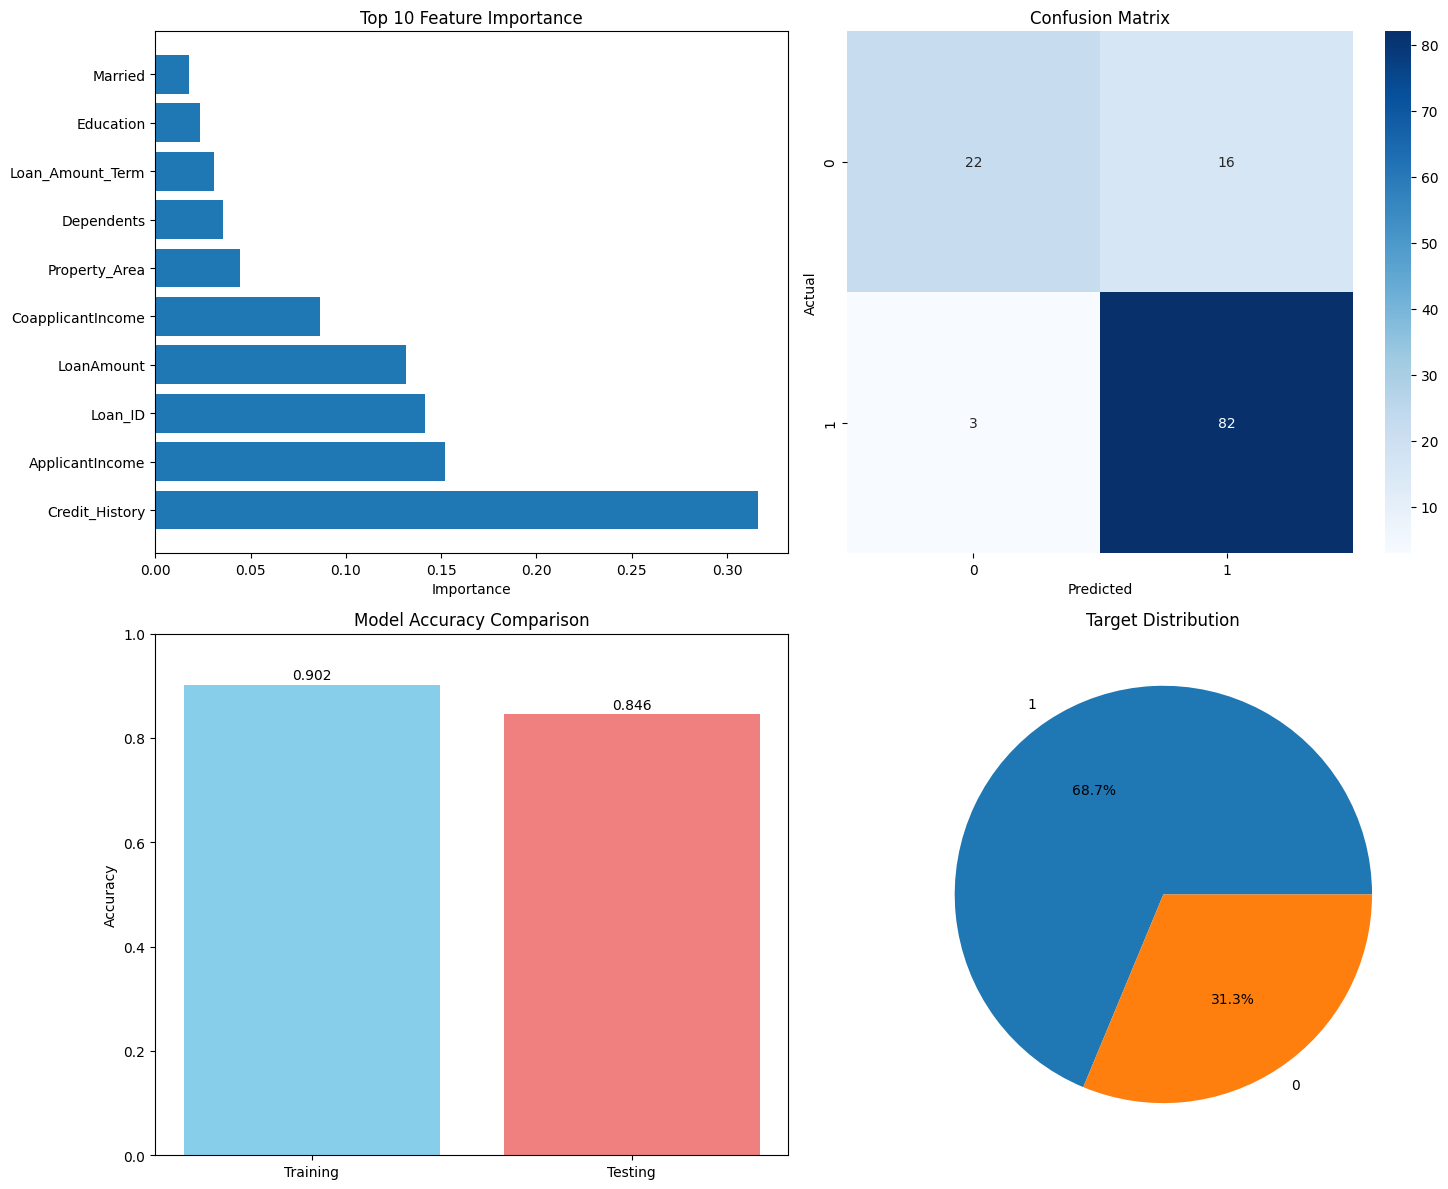

In [20]:
print("📈 CREATING VISUALIZATIONS")
print("=" * 50)

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Feature Importance Plot
axes[0, 0].barh(feature_importance.head(10)['Feature'],
                feature_importance.head(10)['Importance'])
axes[0, 0].set_title('Top 10 Feature Importance')
axes[0, 0].set_xlabel('Importance')

# 2. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# 3. Accuracy Comparison
accuracies = ['Training', 'Testing']
accuracy_values = [train_accuracy, test_accuracy]
axes[1, 0].bar(accuracies, accuracy_values, color=['skyblue', 'lightcoral'])
axes[1, 0].set_title('Model Accuracy Comparison')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_ylim(0, 1)

# Add value labels on bars
for i, v in enumerate(accuracy_values):
    axes[1, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# 4. Target Distribution
y.value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title('Target Distribution')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

In [21]:
print("📋 MODEL SUMMARY")
print("=" * 50)

summary_data = {
    'Metric': [
        'Dataset Size',
        'Number of Features',
        'Training Samples',
        'Testing Samples',
        'Training Accuracy',
        'Testing Accuracy',
        'Number of Trees',
        'Max Depth'
    ],
    'Value': [
        f"{df.shape[0]} rows",
        f"{X.shape[1]} features",
        f"{len(X_train)} samples",
        f"{len(X_test)} samples",
        f"{train_accuracy:.4f} ({train_accuracy*100:.2f}%)",
        f"{test_accuracy:.4f} ({test_accuracy*100:.2f}%)",
        f"{rf_model.n_estimators} trees",
        f"{rf_model.max_depth}"
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

print("\n✅ ANALYSIS COMPLETE!")
print("🎉 Your Random Forest model is ready to use!")


📋 MODEL SUMMARY


Metric            Value
0        Dataset Size         614 rows
1  Number of Features      12 features
2    Training Samples      491 samples
3     Testing Samples      123 samples
4   Training Accuracy  0.9022 (90.22%)
5    Testing Accuracy  0.8455 (84.55%)
6     Number of Trees        100 trees
7           Max Depth               10


✅ ANALYSIS COMPLETE!
🎉 Your Random Forest model is ready to use!


In [22]:
print("\n💾 SAVING MODEL")
print("=" * 50)

import joblib

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("✅ Model saved as 'random_forest_model.pkl'")

# Save feature names for future use
with open('feature_names.txt', 'w') as f:
    for feature in X.columns:
        f.write(f"{feature}\n")
print("✅ Feature names saved as 'feature_names.txt'")

print("\n🎯 TO USE THE SAVED MODEL LATER:")
print("loaded_model = joblib.load('random_forest_model.pkl')")
print("predictions = loaded_model.predict(new_data)")


💾 SAVING MODEL
✅ Model saved as 'random_forest_model.pkl'
✅ Feature names saved as 'feature_names.txt'

🎯 TO USE THE SAVED MODEL LATER:
loaded_model = joblib.load('random_forest_model.pkl')
predictions = loaded_model.predict(new_data)
